In [1]:
# Set up
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Read Data

data_df = pd.read_csv("Resources/HPI_master.csv")

print(HPI.head())
print(HPI.shape)
print(HPI.dtypes)

      hpi_type     hpi_flavor frequency                   level  \
0  traditional  purchase-only   monthly  USA or Census Division   
1  traditional  purchase-only   monthly  USA or Census Division   
2  traditional  purchase-only   monthly  USA or Census Division   
3  traditional  purchase-only   monthly  USA or Census Division   
4  traditional  purchase-only   monthly  USA or Census Division   

                    place_name place_id    yr  period  index_nsa  index_sa  
0  East North Central Division   DV_ENC  1991       1     100.00    100.00  
1  East North Central Division   DV_ENC  1991       2     100.91    100.97  
2  East North Central Division   DV_ENC  1991       3     101.31    100.93  
3  East North Central Division   DV_ENC  1991       4     101.70    100.99  
4  East North Central Division   DV_ENC  1991       5     102.33    101.38  
(123141, 10)
hpi_type       object
hpi_flavor     object
frequency      object
level          object
place_name     object
place_id    

In [69]:
# Preprocess data
# Data for pre and post Covid periods data frame

pre_covid = data_df[data_df['yr'] < 2020]
post_covid = data_df[data_df['yr'] >= 2020]



In [70]:
# Analyze data
# Create Average Variable data frame
# Group data by year by calculating average of the periods 

pre_covid_avg = pre_covid.groupby(['yr', 'period'])['index_nsa'].mean().reset_index()
post_covid_avg = post_covid.groupby(['yr', 'period'])['index_nsa'].mean().reset_index()

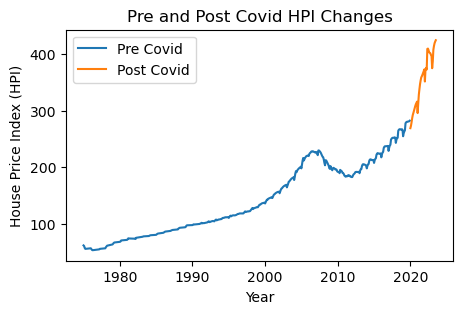

In [94]:
# Create Plots
fig, ax = plt.subplots(figsize=(5, 3))

#Plot Regression lines
ax.plot(pre_covid_avg['yr'] + (pre_covid_avg['period'] - 1) / 12, pre_covid_avg['index_nsa'], label='Pre Covid')
ax.plot(post_covid_avg['yr'] + (post_covid_avg['period'] - 1) / 12, post_covid_avg['index_nsa'], label='Post Covid')

# ax.plot(pre_covid_avg['yr'], pre_covid_avg['index_nsa'], label='Pre Covid')
# ax.plot(post_covid_avg['yr'], post_covid_avg['index_nsa'], label='Post Covid')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('House Price Index (HPI)')
ax.set_title('Pre and Post Covid HPI Changes')

# Add legends
ax.legend()

# Show the plot
plt.show()

In [65]:
#Print values
print(f"Average change for Pre Covid: {pre_slope}")
print(f"Average change for Post Covid: {post_slope}")

Average change for Pre Covid: 4.945406947539172
Average change for Post Covid: 43.30019258522114


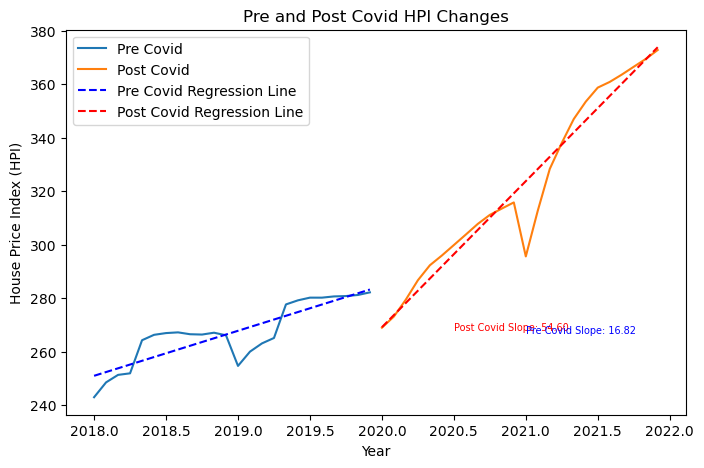

In [105]:

# Add time to data frames for pre covid average and post covid average 

pre_covid_avg['time'] = pre_covid_avg['yr'] + (pre_covid_avg['period'] - 1) / 12
post_covid_avg['time'] = post_covid_avg['yr'] + (post_covid_avg['period'] - 1) / 12

# calculate slope and intercept of the regression line using linear regression using np.polyfir function
pre_slope, pre_intercept = np.polyfit(pre_covid_avg['time'], pre_covid_avg['index_nsa'], 1)
post_slope, post_intercept = np.polyfit(post_covid_avg['time'], post_covid_avg['index_nsa'], 1)

#create new figure with axes for the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Use x and y parameters for the plot
ax.plot(pre_covid_avg['time'], pre_covid_avg['index_nsa'], label='Pre Covid')
ax.plot(post_covid_avg['time'], post_covid_avg['index_nsa'], label='Post Covid')

#Plotting Regression lines
ax.plot(pre_covid_avg['time'], pre_slope * pre_covid_avg['time'] + pre_intercept, color='blue', linestyle='--', label='Pre Covid Regression Line')
ax.plot(post_covid_avg['time'], post_slope * post_covid_avg['time'] + post_intercept, color='red', linestyle='--', label='Post Covid Regression Line')

# Setting labels
ax.set_xlabel('Year')
ax.set_ylabel('House Price Index (HPI)')
ax.set_title('Pre and Post Covid HPI Changes')

# Adding Legend
ax.legend()

# Show text on the graph - use ax.text in Matplotlib
ax.text(2020+.5, post_slope * 2020 + post_intercept, f'Post Covid Slope: {post_slope:.2f}', fontsize=7, color='red', va='center', ha='left')
ax.text(2019+2, pre_slope * 2019 + pre_intercept, f'Pre Covid Slope: {pre_slope:.2f}', fontsize=7, color='blue', va='center', ha='left')

# Show the plot
plt.show()



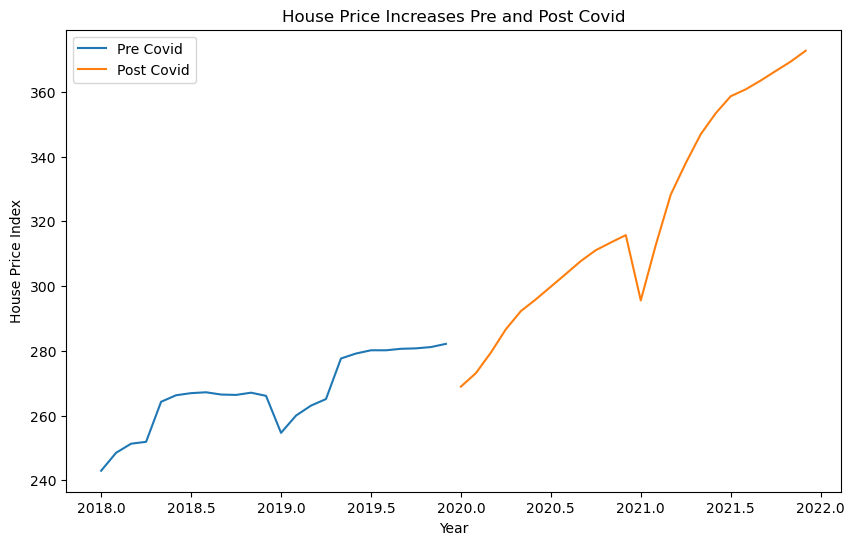

In [104]:
# Data for years 2018 to  2022

# Filter of data for Pre and Post Covid periods
pre_covid = data_df[(data_df['yr'] >= 2018) & (data_df['yr'] <= 2019)]
post_covid = data_df[(data_df['yr'] >= 2020) & (data_df['yr'] <= 2021)]

# Analyze and plot the data
# Group by 'yr' and 'period' for average house prices

pre_covid_avg = pre_covid.groupby(['yr', 'period'])['index_nsa'].mean().reset_index()
post_covid_avg = post_covid.groupby(['yr', 'period'])['index_nsa'].mean().reset_index()

# Create plots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Pre Covid data
ax.plot(pre_covid_avg['yr'] + (pre_covid_avg['period'] - 1) / 12, pre_covid_avg['index_nsa'], label='Pre Covid')

# Plot Post Covid data
ax.plot(post_covid_avg['yr'] + (post_covid_avg['period'] - 1) / 12, post_covid_avg['index_nsa'], label='Post Covid')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('House Price Index')
ax.set_title('House Price Increases Pre and Post Covid')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [96]:
# Calculate the slope 

# Combine year and period for a continuous time variable
pre_covid_avg['time'] = pre_covid_avg['yr'] + (pre_covid_avg['period'] - 1) / 12
post_covid_avg['time'] = post_covid_avg['yr'] + (post_covid_avg['period'] - 1) / 12

# Fit a linear regression model to each set of data
pre_slope, pre_intercept = np.polyfit(pre_covid_avg['time'], pre_covid_avg['index_nsa'], 1)
post_slope, post_intercept = np.polyfit(post_covid_avg['time'], post_covid_avg['index_nsa'], 1)

print(f"Slope for Pre Covid: {pre_slope}")
print(f"Slope for Post Covid: {post_slope}")

Slope for Pre Covid: 16.823197838997487
Slope for Post Covid: 54.59919649593979


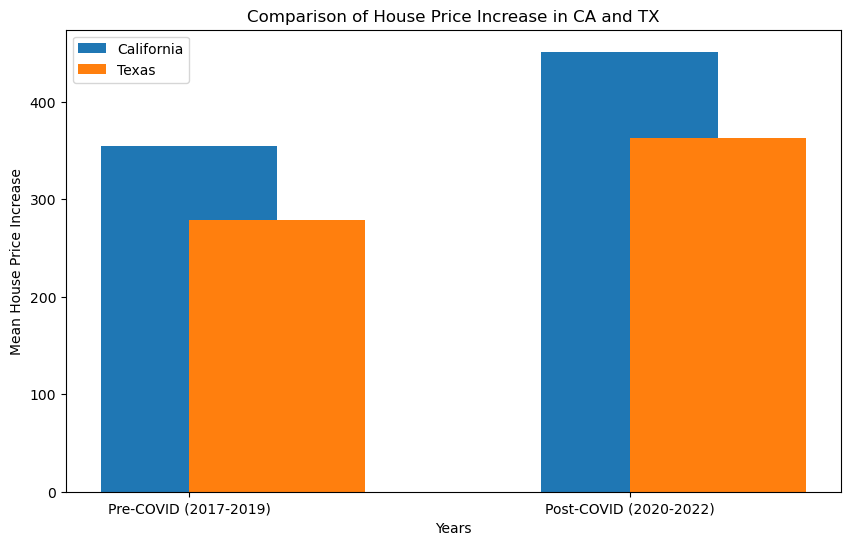

In [85]:
#Read Data

data_df = pd.read_csv("Resources/HPI_master.csv")


# Filter data for CA and TX

ca_data = data_df[data_df['place_id'] == 'CA']
tx_data = data_df[data_df['place_id'] == 'TX']

# Filter data for pre-covid and post-covid years

pre_covid_years = [2017, 2018, 2019]
post_covid_years = [2020, 2021, 2022]

ca_pre_covid = ca_data[ca_data['yr'].isin(pre_covid_years)]
tx_pre_covid = tx_data[tx_data['yr'].isin(pre_covid_years)]

ca_post_covid = ca_data[ca_data['yr'].isin(post_covid_years)]
tx_post_covid = tx_data[tx_data['yr'].isin(post_covid_years)]

# Calculate the mean price increase for each group
ca_pre_covid_mean = ca_pre_covid['index_nsa'].mean()
tx_pre_covid_mean = tx_pre_covid['index_nsa'].mean()

ca_post_covid_mean = ca_post_covid['index_nsa'].mean()
tx_post_covid_mean = tx_post_covid['index_nsa'].mean()

# Create a bar chart for pre-covid and post-covid years
years = ['Pre-COVID (2017-2019)', 'Post-COVID (2020-2022)']
ca_means = [ca_pre_covid_mean, ca_post_covid_mean]
tx_means = [tx_pre_covid_mean, tx_post_covid_mean]

plt.figure(figsize=(10, 6))
plt.bar(years, ca_means, width=0.4, label='California', align='center')
plt.bar(years, tx_means, width=0.4, label='Texas', align='edge')

plt.xlabel('Years')
plt.ylabel('Mean House Price Increase')
plt.title('Comparison of House Price Increase in CA and TX')
plt.legend()
plt.show()

